In [ ]:
#Installing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
#Import & Explore the dataset

In [2]:
df=pd.read_csv('E:\\BreastCancer3.csv')

In [3]:
df.head()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,5,1.0,1.0,1.0,2.0,1,3,1.0,1,benign
1,5,4.0,4.0,5.0,7.0,10,3,2.0,1,benign
2,3,1.0,1.0,1.0,2.0,2,3,1.0,1,benign
3,6,8.0,8.0,1.0,3.0,4,3,7.0,1,benign
4,4,1.0,1.0,3.0,2.0,1,3,1.0,1,benign


In [4]:
df.shape

(683, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
Cl.thickness       683 non-null int64
Cell.size          682 non-null float64
Cell.shape         682 non-null float64
Marg.adhesion      682 non-null float64
Epith.c.size       682 non-null float64
Bare.nuclei        680 non-null object
Bl.cromatin        683 non-null int64
Normal.nucleoli    681 non-null float64
Mitoses            683 non-null int64
Class              683 non-null object
dtypes: float64(5), int64(3), object(2)
memory usage: 53.4+ KB


In [33]:
df['Normal.nucleoli']=df['Normal.nucleoli'].astype(float)

In [34]:
df.dtypes

Cl.thickness        object
Cell.size           object
Cell.shape          object
Marg.adhesion       object
Epith.c.size        object
Bare.nuclei         object
Bl.cromatin         object
Normal.nucleoli    float64
Mitoses             object
Class               object
dtype: object

In [35]:
df.head()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,5,1.0,1.0,1.0,2.0,1,3,1.0,1,benign
1,5,4.0,4.0,5.0,7.0,10,3,2.0,1,benign
2,3,1.0,1.0,1.0,2.0,2,3,1.0,1,benign
3,6,8.0,8.0,1.0,3.0,4,3,7.0,1,benign
4,4,1.0,1.0,3.0,2.0,1,3,1.0,1,benign


In [36]:
df.tail()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
678,3,1.0,1.0,1.0,3.0,2,1,1.0,1,benign
679,2,1.0,1.0,1.0,2.0,1,1,1.0,1,benign
680,5,10.0,10.0,3.0,7.0,3,8,10.0,2,malignant
681,4,8.0,6.0,4.0,3.0,4,10,6.0,1,malignant
682,4,8.0,8.0,5.0,4.0,5,10,4.0,1,malignant


In [37]:
df['Mitoses'].unique()

array(['1', '5', '4', '2', '3', '7', '10', '8', '6'], dtype=object)

In [ ]:
#Standardisation / Transformations

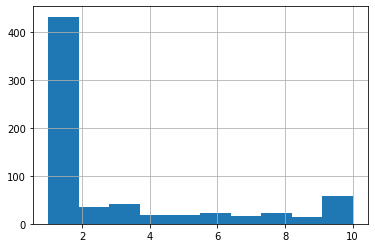

In [38]:
df['Normal.nucleoli'].hist(bins=10)

In [47]:
a=1/(df['Normal.nucleoli'])

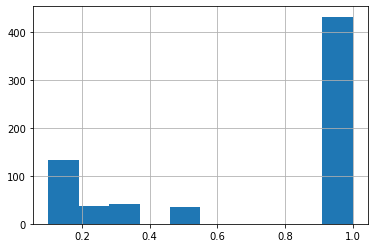

In [48]:
a.hist(bins=10)

In [ ]:
#Split the data into train & test

In [49]:
df.columns

Index(['Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion',
       'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli',
       'Mitoses', 'Class'],
      dtype='object')

In [51]:
X=df.drop(['Class'],axis=1)

In [52]:
Y=df.drop(['Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion',
       'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli',
       'Mitoses'],axis=1)

In [53]:
X.head()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
0,5,1.0,1.0,1.0,2.0,1,3,1.0,1
1,5,4.0,4.0,5.0,7.0,10,3,2.0,1
2,3,1.0,1.0,1.0,2.0,2,3,1.0,1
3,6,8.0,8.0,1.0,3.0,4,3,7.0,1
4,4,1.0,1.0,3.0,2.0,1,3,1.0,1


In [54]:
Y.head()

,Class
0,benign
1,benign
2,benign
3,benign
4,benign


In [55]:
X.dtypes

Cl.thickness        object
Cell.size           object
Cell.shape          object
Marg.adhesion       object
Epith.c.size        object
Bare.nuclei         object
Bl.cromatin         object
Normal.nucleoli    float64
Mitoses             object
dtype: object

In [56]:
Y['Class']=np.where(df['Class']=='benign',1,0)

In [57]:
Y.head()

,Class
0,1
1,1
2,1
3,1
4,1


In [58]:
Y.dtypes

Class    int32
dtype: object

In [59]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)

In [60]:
X_train.shape

(478, 9)

In [62]:
Y_train.shape

(478, 1)

In [63]:
X_test.shape

(205, 9)

In [64]:
Y_test.shape

(205, 1)

In [ ]:
#Outlier Treatment

In [ ]:
Q1
Q3
IQR
Outliers_h=Q3+1.5*IQR
Outliers_l=Q1-1.5*IQR

In [65]:
Q1=df['Normal.nucleoli'].quantile(0.25)

In [66]:
Q3=df['Normal.nucleoli'].quantile(0.75)

In [68]:
IQR=Q3-Q1
IQR

3.0

In [69]:
outliers_h=Q3+1.5*IQR
outliers_h

8.5

In [70]:
outliers_l=Q1-1.5*IQR
outliers_l

-3.5

In [84]:
X_train['Normal.nucleoli'].min()

1.0

In [85]:
X_train['Normal.nucleoli'].max()

10.0

In [86]:
X_train['Normal.nucleoli'].median()

1.0

In [87]:
X_train['Normal.nucleoli']=np.where(X_train['Normal.nucleoli']>8.5,1,X_train['Normal.nucleoli'])

C:\Users\Madhu Kondaveti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [88]:
X_train.head()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
15,7,4.0,6.0,4.0,6.0,1,4,3.0,1
345,10,3.0,5.0,4.0,3.0,7,3,5.0,3
97,7,5.0,6.0,10.0,5.0,10,7,1.0,4
446,3,1.0,1.0,1.0,2.0,5,1,1.0,1
333,1,1.0,1.0,1.0,1.0,1,1,3.0,1


In [90]:
X_train['Normal.nucleoli'].max()

8.0

In [ ]:
#Imputation

In [91]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 15 to 290
Data columns (total 9 columns):
Cl.thickness       478 non-null object
Cell.size          478 non-null object
Cell.shape         478 non-null object
Marg.adhesion      478 non-null object
Epith.c.size       478 non-null object
Bare.nuclei        477 non-null object
Bl.cromatin        478 non-null object
Normal.nucleoli    477 non-null float64
Mitoses            478 non-null object
dtypes: float64(1), object(8)
memory usage: 37.3+ KB


In [94]:
X_train['Bare.nuclei']=X_train['Bare.nuclei'].fillna(X_train['Bare.nuclei'].mode())

C:\Users\Madhu Kondaveti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
X_train['Normal.nucleoli']=X_train['Normal.nucleoli'].fillna(X_train['Normal.nucleoli'].median())

C:\Users\Madhu Kondaveti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [96]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 15 to 290
Data columns (total 9 columns):
Cl.thickness       478 non-null object
Cell.size          478 non-null object
Cell.shape         478 non-null object
Marg.adhesion      478 non-null object
Epith.c.size       478 non-null object
Bare.nuclei        477 non-null object
Bl.cromatin        478 non-null object
Normal.nucleoli    478 non-null float64
Mitoses            478 non-null object
dtypes: float64(1), object(8)
memory usage: 37.3+ KB


In [100]:
X_train['Cl.thickness'].unique()

array(['7', '10', '3', '1', '8', '5', '6', '4', '2', '9'], dtype=object)

In [101]:
X_train['Cell.size'].unique()

array(['4.0', '3.0', '5.0', '1.0', '10.0', '8.0', '2.0', '6.0', '7.0',
       'nan', '9.0'], dtype=object)

In [110]:
X_train['Cell.size']=np.where(X_train['Cell.size']=='nan',X_train['Cell.size'].mode(),X_train['Cell.size'])

C:\Users\Madhu Kondaveti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [111]:
X_train['Cell.size'].unique()

array(['4.0', '3.0', '5.0', '1.0', '10.0', '8.0', '2.0', '6.0', '7.0',
       '9.0'], dtype=object)

In [103]:
X_train['Cell.shape'].unique()

array(['6.0', '5.0', '1.0', '10.0', '3.0', '9.0', '4.0', '2.0', '8.0',
       '7.0', 'nan'], dtype=object)

In [112]:
X_train['Cell.shape']=np.where(X_train['Cell.shape']=='nan',X_train['Cell.shape'].mode(),X_train['Cell.shape'])

C:\Users\Madhu Kondaveti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [113]:
X_train['Cell.shape'].unique()

array(['6.0', '5.0', '1.0', '10.0', '3.0', '9.0', '4.0', '2.0', '8.0',
       '7.0'], dtype=object)

In [104]:
X_train['Marg.adhesion'].unique()

array(['4.0', '10.0', '1.0', '3.0', '5.0', '9.0', '8.0', '6.0', '2.0',
       'nan', '7.0'], dtype=object)

In [114]:
X_train['Marg.adhesion']=np.where(X_train['Marg.adhesion']=='nan',X_train['Marg.adhesion'].mode(),X_train['Marg.adhesion'])

C:\Users\Madhu Kondaveti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [115]:
X_train['Marg.adhesion'].unique()

array(['4.0', '10.0', '1.0', '3.0', '5.0', '9.0', '8.0', '6.0', '2.0',
       '7.0'], dtype=object)

In [105]:
X_train['Epith.c.size'].unique()

array(['6.0', '3.0', '5.0', '2.0', '1.0', '7.0', '4.0', '10.0', '8.0',
       'nan', '9.0'], dtype=object)

In [116]:
X_train['Epith.c.size']=np.where(X_train['Epith.c.size']=='nan',X_train['Epith.c.size'].mode(),X_train['Epith.c.size'])

C:\Users\Madhu Kondaveti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [117]:
X_train['Epith.c.size'].unique()

array(['6.0', '3.0', '5.0', '2.0', '1.0', '7.0', '4.0', '10.0', '8.0',
       '9.0'], dtype=object)

In [106]:
X_train['Bare.nuclei'].unique()

array(['1', '7', '10', '5', '3', nan, '2', '4', '8', '9', '6', 'Na'],
      dtype=object)

In [118]:
X_train['Bare.nuclei']=np.where(X_train['Bare.nuclei']=='nan',X_train['Bare.nuclei'].mode(),X_train['Bare.nuclei'])

C:\Users\Madhu Kondaveti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [119]:
X_train['Bare.nuclei']=np.where(X_train['Bare.nuclei']=='Na',X_train['Bare.nuclei'].mode(),X_train['Bare.nuclei'])

C:\Users\Madhu Kondaveti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [123]:
X_train['Bare.nuclei'].unique()

array(['1', '7', '10', '5', '3', nan, '2', '4', '8', '9', '6'],
      dtype=object)

In [122]:
X_train['Bare.nuclei']=X_train['Bare.nuclei'].fillna(X_train['Bare.nuclei'].mode())

C:\Users\Madhu Kondaveti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [125]:
X_train.to_csv('C:\\Users\\Madhu Kondaveti\\Desktop\\BCTrain.csv')

In [128]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 15 to 290
Data columns (total 9 columns):
Cl.thickness       478 non-null object
Cell.size          478 non-null object
Cell.shape         478 non-null object
Marg.adhesion      478 non-null object
Epith.c.size       478 non-null object
Bare.nuclei        478 non-null object
Bl.cromatin        478 non-null object
Normal.nucleoli    478 non-null float64
Mitoses            478 non-null object
dtypes: float64(1), object(8)
memory usage: 37.3+ KB


In [127]:
X_train['Bare.nuclei']=X_train['Bare.nuclei'].fillna(0)

C:\Users\Madhu Kondaveti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [108]:
X_train['Normal.nucleoli'].unique()

array([3., 5., 1., 6., 4., 7., 2., 8.])

In [109]:
X_train['Mitoses'].unique()

array(['1', '3', '4', '6', '2', '10', '8', '7', '5'], dtype=object)

In [ ]:
#Multicollinearity

In [ ]:
#Model Building

In [97]:
logreg=LogisticRegression()

In [129]:
model=logreg.fit(X_train,Y_train)

C:\Users\Madhu Kondaveti\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Madhu Kondaveti\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [130]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [131]:
model.coef_

array([[-0.23120017, -0.18144915, -0.28151579, -0.15025541, -0.03257243,
        -0.29579503, -0.32661368,  0.11870001, -0.22191425]])

In [132]:
X_train.columns

Index(['Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion',
       'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli',
       'Mitoses'],
      dtype='object')

In [133]:
model.intercept_

array([5.95421602])

In [ ]:
#Predict for the train data

In [134]:
train_pred=model.predict(X_train)

In [136]:
train_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,

In [138]:
Y_train.head()

,Class
15,0
345,0
97,0
446,1
333,1


In [ ]:
#Accuracy measures for train data

In [139]:
train_conf=metrics.confusion_matrix(Y_train,train_pred)

In [140]:
train_conf

array([[155,   7],
       [  8, 308]], dtype=int64)

In [141]:
(155+308)/(155+7+8+308)

0.9686192468619247

In [ ]:
#Predict for the test data

In [143]:
X_test.to_csv('C:\\Users\\Madhu Kondaveti\\Desktop\\BCTest.csv')

In [144]:
X_test['Bare.nuclei']=X_test['Bare.nuclei'].fillna(0)

C:\Users\Madhu Kondaveti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [145]:
X_test['Normal.nucleoli']=X_test['Normal.nucleoli'].fillna(0)

C:\Users\Madhu Kondaveti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [146]:
test_pred=model.predict(X_test)

In [147]:
test_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1])

In [149]:
Y_test.head()

,Class
264,0
665,0
224,0
346,0
509,1


In [ ]:
#Accuracy measures for test data

In [150]:
test_conf=metrics.confusion_matrix(Y_test,test_pred)

In [151]:
test_conf

array([[ 70,   7],
       [  1, 127]], dtype=int64)

In [152]:
(70+127)/(70+7+1+127)

0.9609756097560975

In [ ]:
#Compare the train & test data accuracy and take a decision

In [153]:
(155+308)/(155+7+8+308)

0.9686192468619247

In [154]:
(70+127)/(70+7+1+127)

0.9609756097560975

In [ ]:
#Predict for the new data

In [157]:
new=pd.read_csv('C:\\Users\\Madhu Kondaveti\\Desktop\\BC_New.csv')

In [158]:
new_pred=model.predict(new)

In [159]:
new_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])